In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

In [56]:
X,y = make_moons(n_samples=400,noise=0.2)

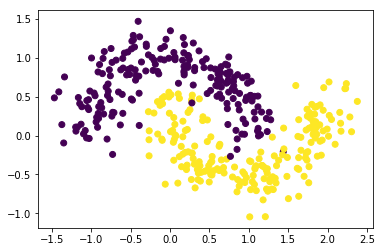

In [60]:
plt.scatter(X[:,0], X[:,1],c=y)

In [61]:
#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


In [62]:
# X
y = y.reshape(-1,1)

In [63]:
epoch=50000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

In [64]:
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [65]:
# wh.shape
# wout.shape

In [66]:
for i in range(epoch):

    #Forward Propogation
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    
    #Backpropagation
    E = y - output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr

In [67]:
int(round(output[0][0]))

1

In [68]:
y[0]

array([1], dtype=int64)

In [69]:
for i in range(len(output)):
    output[i] = int(round(output[i][0]))

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y,output)

0.9925